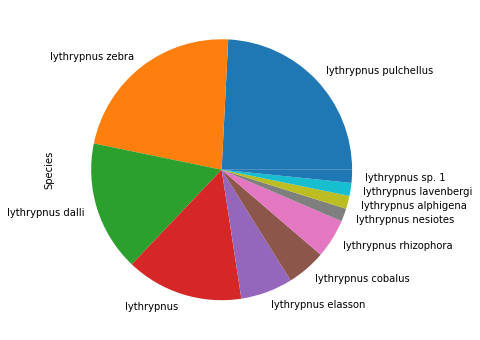

In [11]:
import idigbio
#https://github.com/idigbio/idigbio-search-api/wiki
import urllib.request, urllib.parse, urllib.error #I don't think we're using this
import json
import pandas as pd

def species_freqs(df1): 
#pass it a pandas dataframe with Species as a column
    species_series=df1["Species"]
    count=species_series.value_counts()
    count.plot.pie(y=count[1], figsize=(6,6))
    

api = idigbio.json()
record_list = api.search_records(rq={"genus": "Lythrypnus"}, fields=["scientificname","country", "institutioncode", "individualcount"])
#find the field list here https://github.com/idigbio/idigbio-search-api/wiki/Index-Fields#record-query-fields
#print(record_list)
#collections=json.loads(record_list.read())
#print(collections)
data=[]
for item in record_list['items']: #the indexTerms is a subdictionary including the fields requested above
    info= item['indexTerms']  #extracting this as info makes it parsable
    try: 
        obs=[info['scientificname'], info['institutioncode'], info['country'], info['individualcount']]
        data.append(obs)
    except:  
        continue
df = pd.DataFrame(data, columns = ['Species', 'Museum', 'Country','Specimen_number']) 
#it is now possible to pull subset of data of interest from the data frame
#print(df)  
species_freqs(df)
        

myDF = getInfoForGenus("Lythrypnus", ["scientificname","country", "institutioncode"])
print(myDF)

